Este colab fue desarrollado por Arnold Charry Armero

# Location Facilities

Una empresa se plantea abrir almacenes en cuatro
ciudades: Nueva York, Los Ángeles, Chicago y Atlanta. Cada almacén puede enviar 100 unidades por semana. El costo fijo semanal
de mantener abierto cada almacén es de $\$400$ para Nueva York, $\$500$
para Los Ángeles, $\$300$ para Chicago y $\$150$ para Atlanta.
La región 1 del país requiere 80 unidades por semana, la región 2
requiere 70 unidades por semana, y la región 3 requiere 40 unidades por semana.
Los costos (incluidos los costos de producción y envío) de
El envío de una unidad desde una planta a una región se muestra en la tabla.
11 . Queremos satisfacer las demandas semanales al mínimo coste, sujeto
a la información anterior y a las siguientes restricciones:

1. Si se abre el almacén de Nueva York, entonces
hay que abrir almacén de Los Ángeles.
2.  Como máximo se pueden abrir dos almacenes.
3. Ya sea el almacén de Atlanta o de Los Ángeles
debe ser abierto.
Formule una IP que pueda usarse para minimizar el semanal
costos de satisfacer la demanda.

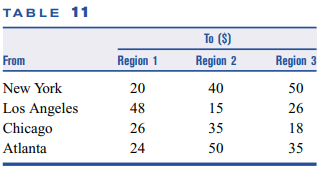

## Conjuntos

$ i = \text{Ciudad indexada por } i$

$ j = \text{Región indexada por } j$

## Parámetros

$ CV_{ij} = \textrm{Costo de producción y envío desde la ciudad } i \textrm{ hasta el cliente en la región }j$

$ CF_{i} = \textrm{Costo fijo de colocar el almacén en la ciudad } i $

$ D_{j} = \textrm{Demanda de la región } j $

## Variables de decisión

$ x_{ij} = \textrm{Cantidad de productos enviados desde la ciudad } i \textrm{ hasta la región }j$

$ y_{i} = \textrm{1 si se abre el almacén } i \textrm{, 0 lo contrario} $

## Función Objetivo
$$ \textrm{Min } z =\sum_{j = 1}^{n} \sum_{i = 1}^{n} CV_{ij}\: x_{ij} + \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

## Restricciones

Se debe satisfacer la demanda,

$$ \sum_{i = 1}^{n}x_{ij} \geq D_{j}, \forall j$$

Restricción de flujo de que si no hay almacén, no hay unidades vendidas,

$$ \sum_{j = 1}^{n}x_{ij} \leq M y_{i}, \forall i $$

Si se abre el almacén de Nueva York, entonces
hay que abrir almacén de Los Ángeles,

$$ y_{1} \leq y_{2} $$

Como máximo se pueden abrir dos almacenes,

$$ \sum_{i = 1}^{n}y_{i} \leq 2 $$

Ya sea el almacén de Atlanta o de Los Ángeles
debe ser abierto,

$$ y_{2} + y_{4} \leq 1 $$

Sólo se pueden producir y enviar hasta 100 unidades por ciudad,

$$ \sum_{j = 1}^{n}x_{ij} \leq 100, \forall i $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.9 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
ciudades = range(4)
regiones = range(3)

In [4]:
CV = [[20, 40, 50],
      [48, 15, 26],
      [26, 35, 18],
      [24, 50, 35]]

CF = [400, 500, 300, 150]

D = [80, 70, 40]

In [5]:
# Crear la instancia del modelo
model = LpProblem(name="Location_Facilities", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (ciudades, regiones), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (ciudades), 0, 1, LpInteger)

# Función objetivo
model += lpSum([[CV[i][j] * X[i][j] for i in ciudades] for j in regiones]) + lpSum([CF[i] * Y[i] for i in ciudades])


# Agregar las restricciones

for j in regiones:
    model += lpSum([X[i][j] for i in ciudades]) >= D[j]

for i in ciudades:
    model += lpSum([X[i][j] for j in regiones]) <= 100

for i in ciudades:
    model += lpSum([X[i][j] for j in regiones]) <= 1000000 * Y[i]

model += Y[0] <= Y[1]

model += Y[1] + Y[3] <= 1

model += lpSum([Y[i] for i in ciudades]) <= 2


# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0_0 = 0.0
X_0_1 = 0.0
X_0_2 = 0.0
X_1_0 = 0.0
X_1_1 = 70.0
X_1_2 = 20.0
X_2_0 = 80.0
X_2_1 = 0.0
X_2_2 = 20.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 0.0
Y_0 = 0.0
Y_1 = 1.0
Y_2 = 1.0
Y_3 = 0.0
Costos totales = $ 4810.0
